Best SARIMA model: SARIMA((2, 2, 0), (0, 1, 0, 12)) MAE: 1166.8225081634373


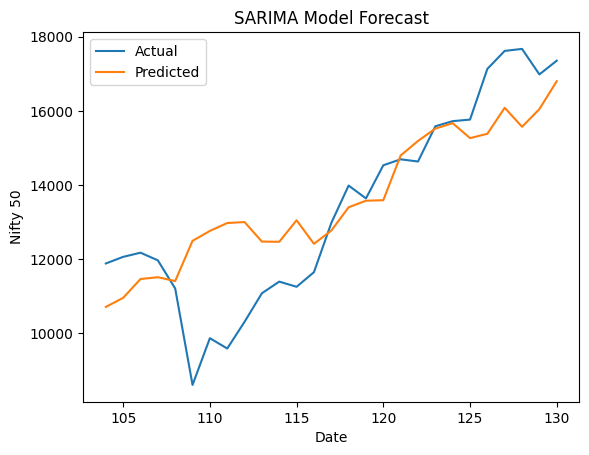

Mean Absolute Error (MAE): 1166.8225081634373
Mean Squared Error (MSE): 2423627.250092131


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from itertools import product
import warnings

# Load data from CSV
data = pd.read_csv('Datafile.csv')  # Replace 'Datafile.csv' with your actual file path

# Assuming 'Nifty_50' is the column name for Nifty 50 data
Y = data['Nifty_50']

# Assuming 'features' is a list of column names for the features
features = ['Nifty_50_lag1', 'Nifty_50_lag2', 'Nifty_50_lag3', 
            'GDP_Billions_of_US_$', 'Per_Capita_US_$',
            'Growth_Rate_%_Change', 'Change_in_growth_Rate',
            'Growth_Rate_(%)_in_GDP_per_Capita', 'GNI_Billions_of_US_$',
            'Per_Capita_US$_1', 'GNI_Growth_Rate', 'GNP_Billions_of_US_$',
            'GNP_Per_Capita', 'GNP_Growth_Rate', 'Inflation_Rate_(%)',
            'Inflation_Rate_Change', 'Output_Manufacturing',
            'Manufacturing_%_of_GDP', 'Nifty_50_lagged']

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train, test = data[:train_size], data[train_size:]

# Define the range of values for p, d, q, P, D, Q, and m (seasonality)
p_values = range(0, 3)  # Adjust range as needed
d_values = range(0, 3)  # Adjust range as needed
q_values = range(0, 3)  # Adjust range as needed
P_values = range(0, 3)  # Adjust range as needed
D_values = range(0, 3)  # Adjust range as needed
Q_values = range(0, 3)  # Adjust range as needed
m_values = [12]  # Assuming monthly seasonality

best_mae, best_cfg = float("inf"), None

# Suppress warnings
warnings.filterwarnings("ignore")

# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for m in m_values:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, m)
                            try:
                                model = SARIMAX(train['Nifty_50'], order=order, seasonal_order=seasonal_order)
                                model_fit = model.fit(disp=False)
                                predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
                                mae = np.mean(np.abs(predictions - test['Nifty_50']))
                                if mae < best_mae:
                                    best_mae, best_cfg = mae, (order, seasonal_order)
                                #print(f'SARIMA{order}{seasonal_order} MAE: {mae}')
                            except:
                                continue

print(f'Best SARIMA model: SARIMA{best_cfg} MAE: {best_mae}')

# Fit SARIMA model with best parameters
best_model = SARIMAX(train['Nifty_50'], order=best_cfg[0], seasonal_order=best_cfg[1])
best_model_fit = best_model.fit(disp=False)

# Forecast
predictions = best_model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Plotting results
plt.plot(test.index, test['Nifty_50'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Nifty 50')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

# Evaluate model
mae = np.mean(np.abs(predictions - test['Nifty_50']))
mse = np.mean((predictions - test['Nifty_50'])**2)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


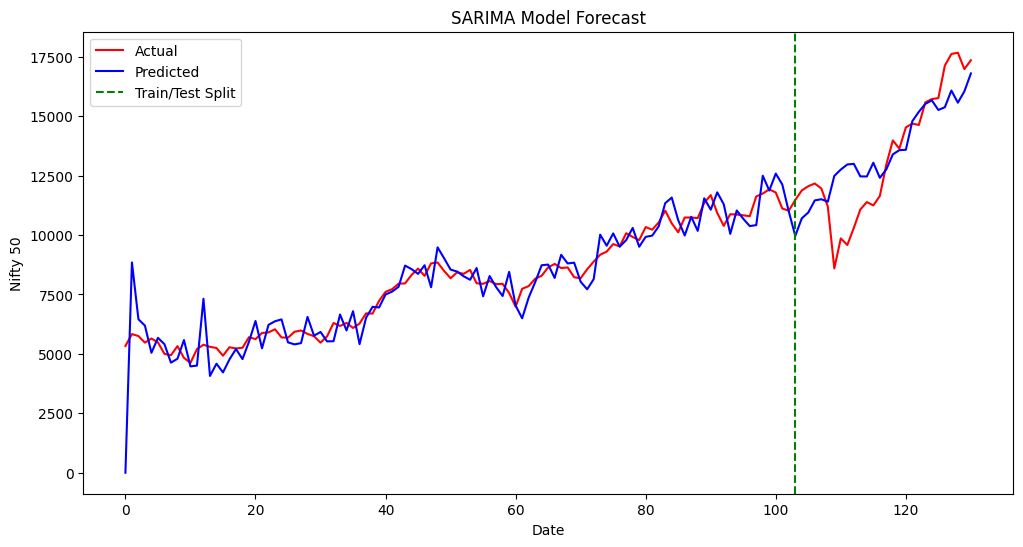

In [7]:
predictions1 = best_model_fit.predict(start=0, end=len(data) - 1)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Nifty_50'], label='Actual', color='red')
plt.plot(data.index, predictions1, label='Predicted', color='blue')
plt.axvline(x=train.index[-1], color='green', linestyle='--', label='Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Nifty 50')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import r2_score

# Evaluate model
r2 = r2_score(data['Nifty_50'], predictions1)
print(f'R^2 Score: {r2}')

R^2 Score: 0.8912362395920319


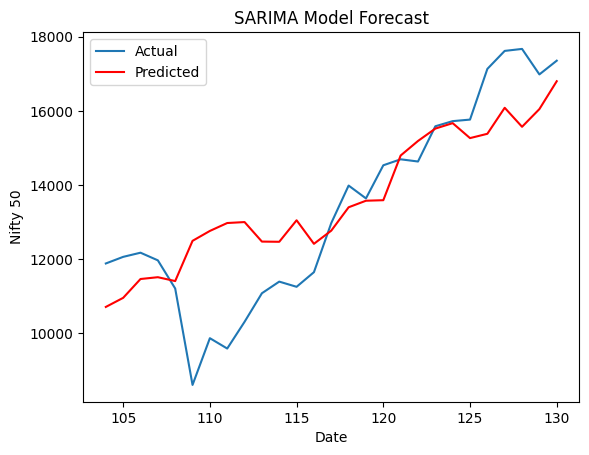

In [10]:
# Plotting results
plt.plot(test.index, test['Nifty_50'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Nifty 50')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()